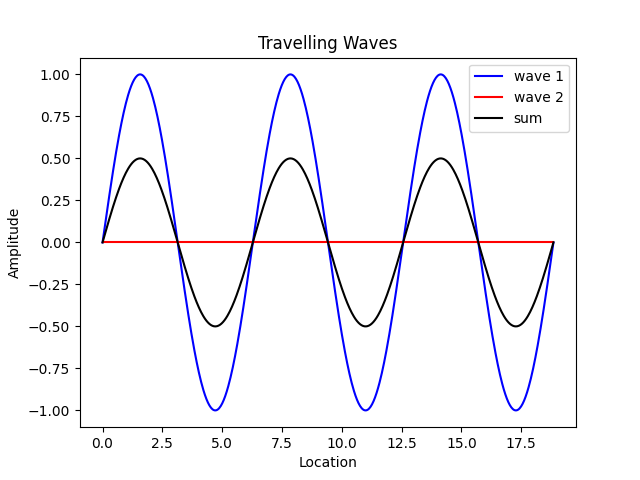

In [1]:
"""travelling_waves.ipynb"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

if typing.TYPE_CHECKING:
    from typing import Generator

    from matplotlib.axes import Axes
    from matplotlib.lines import Line2D
    from numpy.typing import NDArray

%matplotlib widget

xa: NDArray[np.float_]

wave1: Line2D
wave2: Line2D
wave3: Line2D


class WaveParams(typing.NamedTuple):
    Amplitude: float
    WaveNumber: float
    Omega: float


wave1_params: WaveParams = WaveParams(Amplitude=1, WaveNumber=1, Omega=1 / 16)
wave2_params: WaveParams = WaveParams(Amplitude=0, WaveNumber=0, Omega=0)


def plot(ax: Axes, show_waves: bool) -> None:
    global xa, wave1, wave2, wave3

    xa = np.linspace(0, 6 * np.pi, 600)

    ya1: NDArray[np.float_] = wave1_params.Amplitude * np.sin(
        wave1_params.WaveNumber * xa
    )
    ya2: NDArray[np.float_] = wave2_params.Amplitude * np.sin(
        wave2_params.WaveNumber * xa
    )
    ya3: NDArray[np.float_] = (ya1 + ya2) / 2

    if show_waves:
        (wave1,) = ax.plot(xa, ya1, color="blue", label="wave 1")
        (wave2,) = ax.plot(xa, ya2, color="red", label="wave 2")
    else:
        (wave1,) = ax.plot(xa, ya1, color="white")
        (wave2,) = ax.plot(xa, ya2, color="white")

    # Plot the superposition of wave1 and wave2
    (wave3,) = ax.plot(xa, ya3, color="black", label="sum")

    ax.set_title("Travelling Waves")
    ax.set_xlabel("Location")
    ax.set_ylabel("Amplitude")

    ax.legend(loc="upper right")


def anim_frame_counter() -> Generator[int, None, None]:
    n = 0
    # 160 frames = 4 secs (at 40 frames/sec)
    while n < 160:
        n += 1
        yield n


def anim_draw_frame(t: float) -> tuple[Line2D, Line2D, Line2D]:
    ya1: NDArray[np.float_] = wave1_params.Amplitude * np.sin(
        wave1_params.WaveNumber * xa + wave1_params.Omega * t
    )
    wave1.set_data(xa, ya1)
    ya2: NDArray[np.float_] = wave2_params.Amplitude * np.sin(
        wave2_params.WaveNumber * xa + wave2_params.Omega * t
    )
    wave2.set_data(xa, ya2)
    ya3: NDArray[np.float_] = (ya1 + ya2) / 2
    wave3.set_data(xa, ya3)
    return wave1, wave2, wave3


def plot_waves(label: str, show_waves: bool) -> None:
    global anim

    plt.close("all")
    plt.figure(" ")
    ax: Axes = plt.axes()
    plot(ax, show_waves)

    anim = FuncAnimation(
        ax.figure,
        anim_draw_frame,
        anim_frame_counter,
        interval=25,
        blit=True,
        repeat=False,
        cache_frame_data=False,
    )

    plt.show()


plot_waves("Cell 1", show_waves=True)

In [ ]:
# Cell 2 - Wave 2 now half amplitude, same wave number, same wave velocity

wave1_params: WaveParams = WaveParams(Amplitude=1, WaveNumber=1, Omega=1 / 16)
wave2_params: WaveParams = WaveParams(Amplitude=1 / 2, WaveNumber=1, Omega=1 / 16)
plot_waves("Cell 2", show_waves=True)

In [ ]:
# Cell 3 - Wave 2 now same amplitude, half wave number, same wave velocity

wave1_params: WaveParams = WaveParams(Amplitude=1, WaveNumber=1, Omega=1 / 16)
wave2_params: WaveParams = WaveParams(Amplitude=1, WaveNumber=1 / 2, Omega=1 / 16)
plot_waves("Cell 3", show_waves=True)

In [ ]:
# Cell 4 - Wave 2 now same amplitude, same wave number, half wave velocity

wave1_params: WaveParams = WaveParams(Amplitude=1, WaveNumber=1, Omega=1 / 16)
wave2_params: WaveParams = WaveParams(Amplitude=1, WaveNumber=1, Omega=1 / 8)
plot_waves("Cell 4", show_waves=True)

In [ ]:
# Cell 5 - Wave 2 now same amplitude, same wave number, *negative* half wave velocity

wave1_params: WaveParams = WaveParams(Amplitude=1, WaveNumber=1, Omega=1 / 16)
wave2_params: WaveParams = WaveParams(Amplitude=1, WaveNumber=1, Omega=-1 / 8)
plot_waves("Cell 5", show_waves=True)

In [ ]:
# Cell 6 - Wave 2 now same amplitude, same wave number, *negative* wave velocity

wave1_params: WaveParams = WaveParams(Amplitude=1, WaveNumber=1, Omega=1 / 16)
wave2_params: WaveParams = WaveParams(Amplitude=1, WaveNumber=1, Omega=-1 / 16)
plot_waves("Cell 6", show_waves=True)

In [ ]:
# Cell 7 - Wave 2 now same amplitude, same wave number, *negative* wave velocity

plot_waves("Cell 7", show_waves=False)  # Show only superposition wave